In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [ ]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
import pandas as pd



selected_columns = [ "Rooms","Price","Distance","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Propertycount"]
new_data = df[selected_columns]


data = new_data



In [ ]:
data.dtypes

Rooms              int64
Price            float64
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
dtype: object

In [ ]:
#Buscar nulos
data.isnull().sum()

Rooms               0
Price               0
Distance            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Propertycount       0
dtype: int64

In [ ]:
#Borrado de datos nulos
data = data.dropna()
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [ ]:
#Diagrama de distribución
#fig, ax = plt.subplots(figsize=(10, 6))
#data.plot(x = 'Bathroom', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
#ax.set_title('Distribución de precio y area construida');

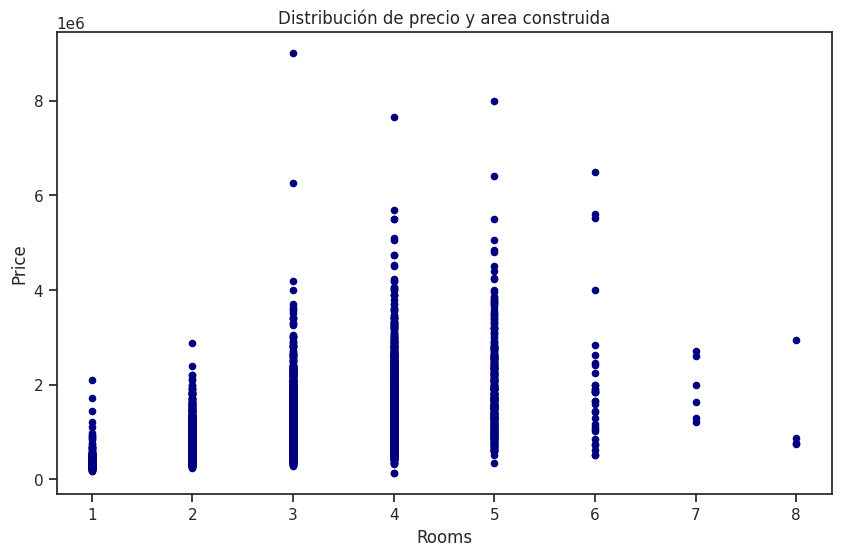

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(x = 'Rooms', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [ ]:
#Diagrama de distribución
#fig, ax = plt.subplots(figsize=(10, 6))
#data.plot(x = 'Bedroom2', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
#ax.set_title('Distribución de precio y area construida');

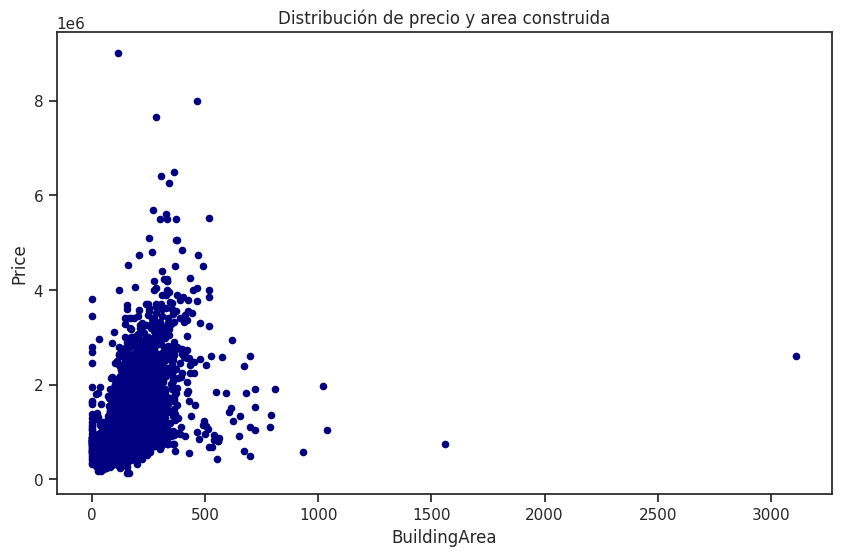

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

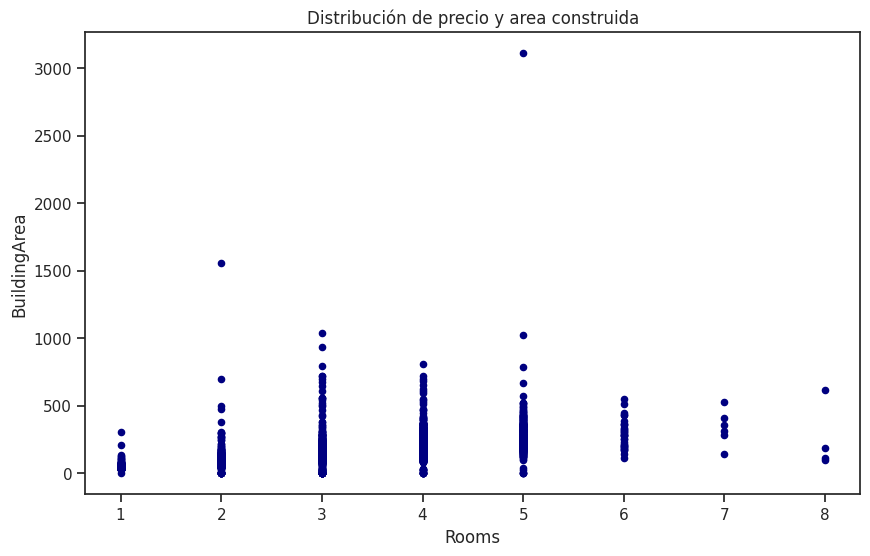

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(x = 'Rooms', y = 'BuildingArea', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [ ]:
#Datos con área menor o igual a 800
data = data[data["BuildingArea"]<=800]
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [ ]:
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [ ]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
data = data[data["BuildingArea"]>=5]
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [ ]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
data = data[(np.abs(zscore(data['BuildingArea']))<=3)]
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


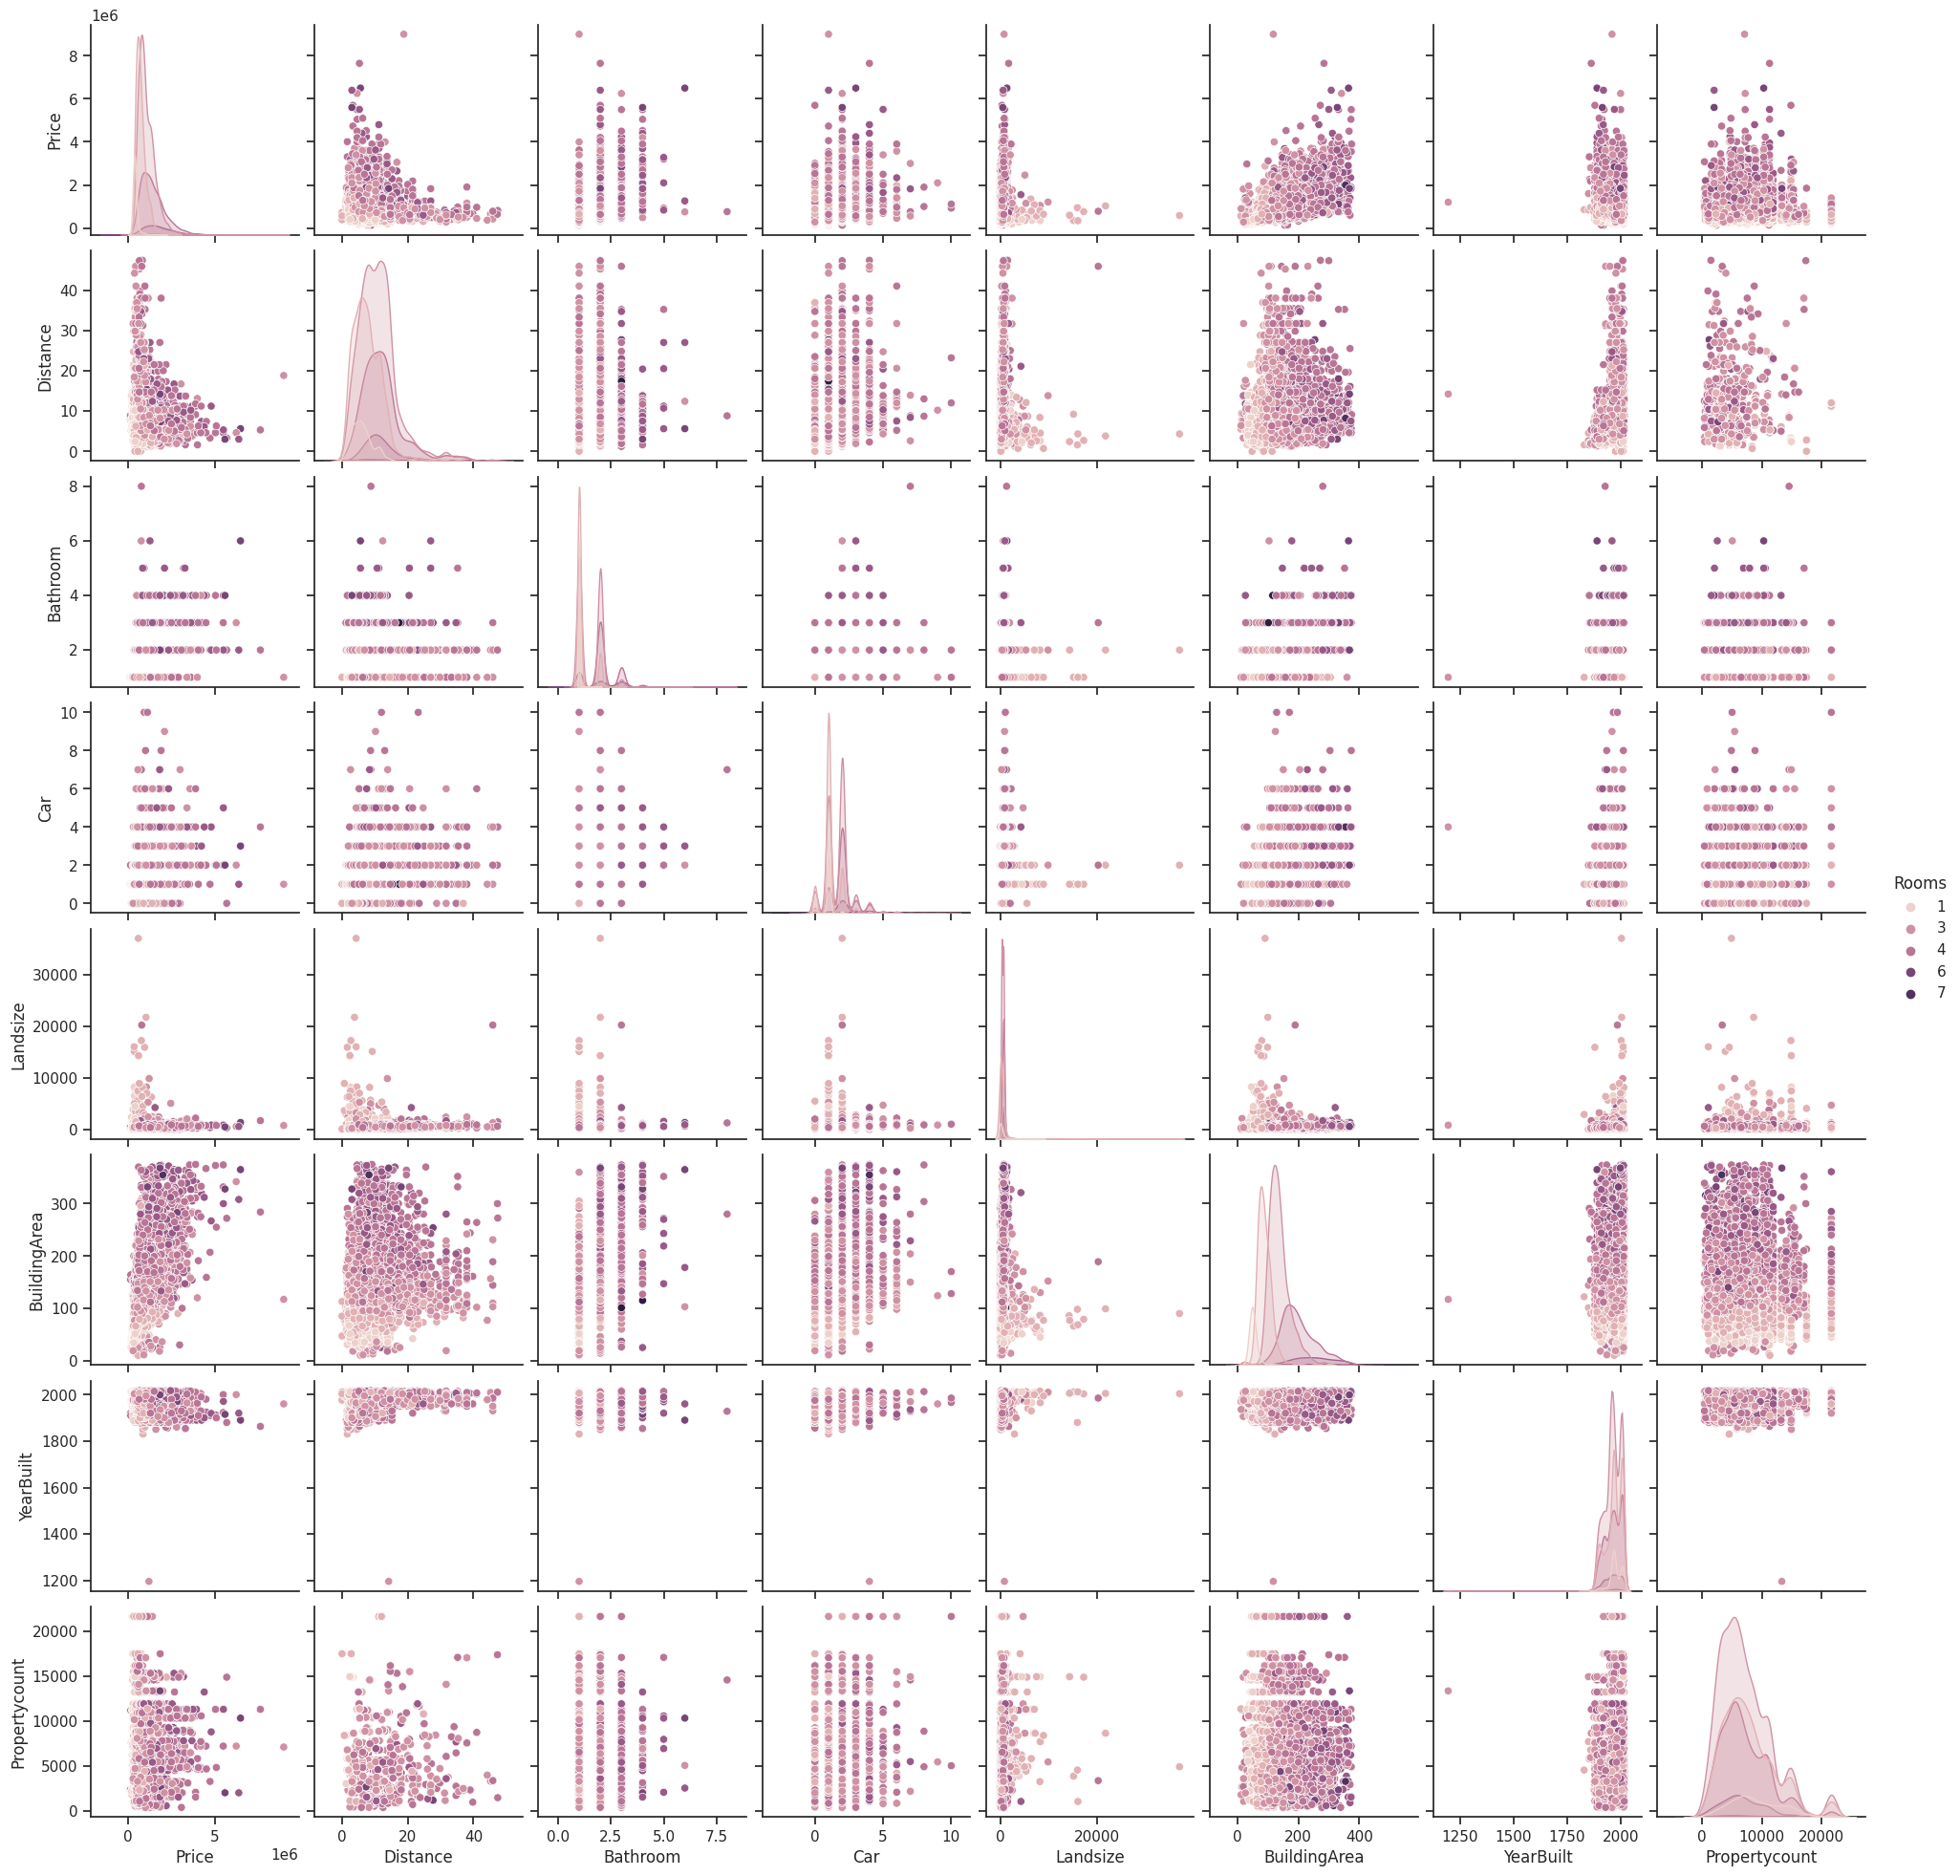

In [ ]:
sb.set_theme(style="ticks")
sb.pairplot(data, hue='Rooms')

<Axes: title={'center': 'Pearson Correlation of Features'}>

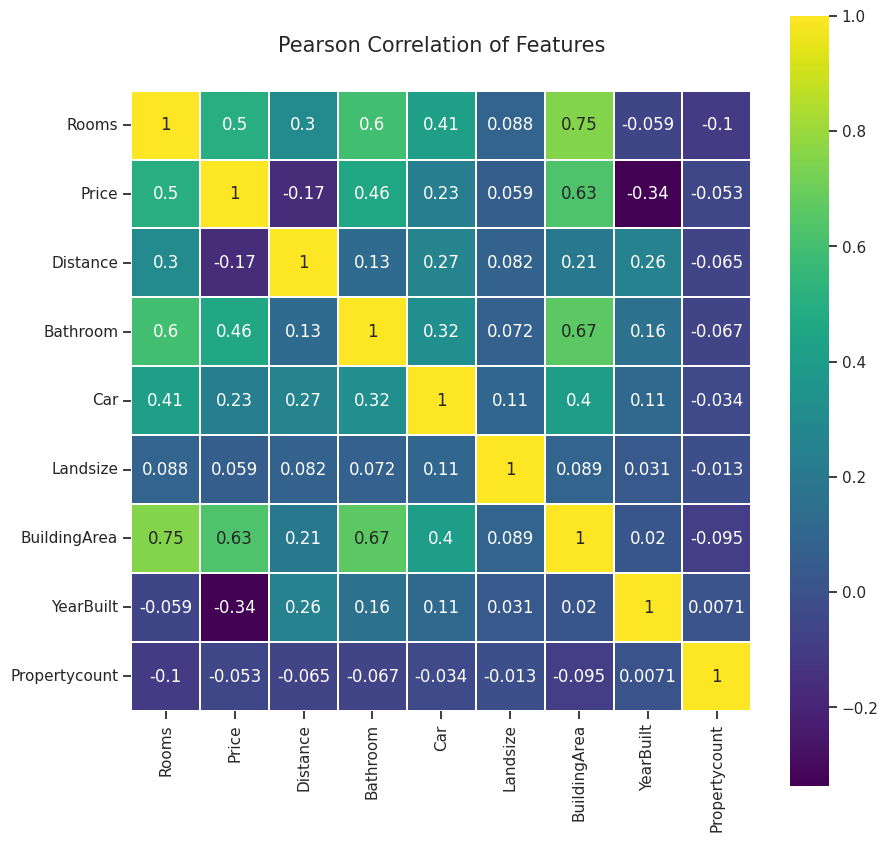

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [ ]:
#Regresión lineal (Area construida vs. Precio)
x = data["BuildingArea"]
y = data["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     4315.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:28:24   Log-Likelihood:                -97109.
No. Observations:                6678   AIC:                         1.942e+05
Df Residuals:                    6676   BIC:                         1.942e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.987e+05   1.45e+04     13.732   

In [ ]:
data.dtypes

Rooms              int64
Price            float64
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
dtype: object

In [ ]:
#Regresión lineal múltiple
x = data.iloc[:,[2,1,3]]
y = data["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.832e+33
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:28:24   Log-Likelihood:             1.3123e+05
No. Observations:                6678   AIC:                        -2.624e+05
Df Residuals:                    6674   BIC:                        -2.624e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.44e-10   2.66e-11    -24.215      0.0

In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm

# Supongamos que "data" es tu DataFrame con los datos

# Variables x a considerar
x_columns = [{"id": 0, "name": "Rooms"}, {"id":2, "name":"Distance"}, {"id":3,"name":"bathroom"}, {"id":4, "name":"Car"}, {"id":5, "name":"LandSize"}, {"id":6, "name":"BuildingArea"}, {"id":7, "name":"YearBuilt"}, {"id":8, "name":"Propertycount"}]
#x_columns = [3,1,2]
best_r2 = -1  # Inicialización para comparar los valores de R²
best_combination = None  # Almacenará la mejor combinación de variables

# Generar todas las combinaciones posibles de 3 variables de entre las 8
from itertools import combinations
variable_combinations = combinations([col["id"] for col in x_columns], 3)

for combo in variable_combinations:
    # Seleccionar las variables según la combinación actual
    x = data.iloc[:, list(combo)]
    y = data["Price"]
    x2 = sm.add_constant(x)

    # Ajustar el modelo de regresión lineal
    est = sm.OLS(y, x2)
    est2 = est.fit()

    # Obtener el valor de R²
    r2 = est2.rsquared

    # Comparar con el mejor valor de R² encontrado hasta ahora
    if r2 > best_r2:
        best_r2 = r2
        best_combination = combo

# Imprimir la mejor combinación de variables y su R²
best_variable_names = [col["name"] for col in x_columns if col["id"] in best_combination]
print("Mejor combinación de variables:")
for idx, name in zip(best_combination, best_variable_names):
    print(f"Variable {idx}: {name}")

print("Mejor valor de R²:", best_r2)

Mejor combinación de variables:
Variable 2: Distance
Variable 6: BuildingArea
Variable 7: YearBuilt
Mejor valor de R²: 0.5636921831256387


In [ ]:
data

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0
